# <div align="center"> Carbon Impact - Data Generation </div>

<div align="center"> ROULET Maria Paula | ROUX Dorian - Bachelor 4</div>

---

### Libraries

In [3]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import warnings
from dateutil.relativedelta import relativedelta
import string
warnings.filterwarnings("ignore")

### Read Data Files

In [2]:
sample_apps = pd.read_csv("../../Carbon_Impact/Data/apps.csv", delimiter=';')
s = sample_apps.sample(11).reset_index()
s[['Application', 'Actions', 'Carbon_Impact']]

,Application,Actions,Carbon_Impact
0,Reddit,Newsfeed,2.480
1,Instagram,Newsfeed,1.050
2,Twitter,Newsfeed,0.600
3,Cisco Webex Meetings,Video Conferencing,0.220
4,Skype,Video Conferencing,0.200
5,TikTok,Newsfeed,2.630
6,Google,Basic Research,0.140
7,Youtube,Newsfeed,0.460
8,DuckDuckGo,Basic Research,0.330
9,Google Meets,Video Conferencing,0.152


### Functions

In [3]:
#Function to append the value to the corresponding dictionnary key
def append_dict(data_dict, lst_key, lst_value):
    for key, val in zip(lst_key, lst_value):
        data_dict[key].append(val)
    return data_dict

In [4]:
#Function that generate values corresponding to some conditions
def generate_time_data(current_daytime, weekdays):
    year = current_daytime.year
    month = current_daytime.month
    day = current_daytime.day
    weekday = weekdays[current_daytime.weekday()]
    time_hm = current_daytime.time()
    date = datetime.datetime(year, month, day)

    return date, year, month, day, weekday, time_hm

In [5]:
#Function that generate values corresponding to some conditions
def generate_values(sample_apps, user_browser, user_vconf, daily_cons, moment):
    
    #If Weekend (S&S)
    if moment == "Day Off":
        w_state = "Late"
        act = None
        app = None
        carbon = 0
        back_cons = random.uniform(0, 0.05)
        daily_cons += + carbon + back_cons
        return w_state, app, act, carbon, back_cons, daily_cons

    elif moment == "Late":
        w_state = "Late"
        act = None
        app = None
        carbon = 0
        back_cons = random.uniform(0, 0.1)
        daily_cons += + carbon + back_cons
        return w_state, app, act, carbon, back_cons, daily_cons
    
    
    elif moment == "High Consumption":
        w_state = "Working"
        rand_app = random.random()
        conditions_act = [rand_app <= 0.35, 0.25 < rand_app < 0.70, 0.7 <= rand_app]
        choice_act = ['Basic Research', 'Video Conferencing', 'Newsfeed']
        act = np.select(conditions_act, choice_act)
        conditions_app = [act == 'Basic Research', act == 'Video Conferencing', act == 'Newsfeed']
        choice_app = [user_browser, random.choice(user_vconf), random.choice(np.unique(sample_apps.Application[sample_apps.Actions == act]))]
        app = np.select(conditions_app, choice_app)
        carbon = float(sample_apps.Carbon_Impact[sample_apps.Application == app])
        back_cons = random.uniform(0, 0.1)
        if act == 'Newsfeed':
            duration = random.randint(1,10)
        elif act == 'Video Conferencing':
            duration = random.randint(20, 90)      
        else:
            duration = random.randint(1, 5)
        return w_state, app, act, carbon, back_cons, duration


    elif moment == "Normal Consumption":
        w_state = "Working"
        rand_app = random.random()
        conditions_act = [rand_app <= 0.4, 0.4 < rand_app < 0.6, 0.6 <= rand_app]
        choice_act = ['Basic Research', 'Video Conferencing', 'Newsfeed']
        act = np.select(conditions_act, choice_act)
        conditions_app = [act == 'Basic Research', act == 'Video Conferencing', act == 'Newsfeed']
        choice_app = [user_browser, random.choice(user_vconf), random.choice(np.unique(sample_apps.Application[sample_apps.Actions == act]))]
        app = np.select(conditions_app, choice_app)
        carbon = float(sample_apps.Carbon_Impact[sample_apps.Application == app])
        back_cons = random.uniform(0, 0.1)
        if act == 'Newsfeed':
            duration = random.randint(1,20)
        elif act == 'Video Conferencing':
            duration = random.randint(20, 90)      
        else:
            duration = random.randint(1, 5)
        return w_state, app, act, carbon, back_cons, duration
                
    elif moment == "No Consumption":
        w_state = "Working"
        act = None
        app = None
        carbon = 0
        back_cons = random.uniform(0.1, 0.25)
        daily_cons += + carbon + back_cons
        return w_state, app, act, carbon, back_cons, daily_cons
    
    elif moment == "Lunch Break":
        w_state = "Break"
        act = None
        app = None
        carbon = 0
        back_cons = random.uniform(0, 0.2)
        daily_cons += + carbon + back_cons
        return w_state, app, act, carbon, back_cons, daily_cons


In [6]:
def Weekly_Pattern():
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]  #Weekdays without Week-end
    ran = random.uniform(0, 1)
    day_lst = random.sample(days, 1) if ran < 0.25 else random.sample(days, 2) if 0.25 <= ran <= 0.75 else random.sample(days, 3)
    return day_lst

### Data Generation

In [24]:
#Create a dictionnary of all the information
app_dict = {"Employee ID":[], 
            "Full Date":[], "Date":[], "Year":[], "Month":[], "Day":[], "Weekday":[], "Week Number":[], "Time":[], 
            "Working State":[], "Action Type":[], "App":[], "Time Spent":[],
            "App Carbon Impact":[], "Background Consumption":[], "Daily Consumption":[]
}

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]  #Weekdays
profiles = ["High Carbon Consumption", "Medium-High Carbon Consumption", "Medium-Low Carbon Consumption", "Low Carbon Consumption"] #Type of Consumption

#Begin and End Dates
start = datetime.datetime(2021, 1, 1, 9, 0) #2021-1-1 9AM
end = datetime.datetime(2021, 12, 30, 18, 0) #2021-3-1 6PM

#Initial information
num_employees = random.randint(5,10) #Number of Employees

for id in range(num_employees): #Loop for each Employee
    
    #Initial Employee and Time Information 
    current_day = start #Set the Initial Date
    week_num = int(current_day.strftime("%V")) #Set the Initial Week Calendar Number
    day_lst = Weekly_Pattern() #Set the Initial Weekly Pattern
    user_browser = random.choice(np.unique(sample_apps.Application[sample_apps.Actions == "Basic Research"])) #Select a single Browser
    user_vconf = [random.choice(np.unique(sample_apps.Application[sample_apps.Actions == "Video Conferencing"])) for _ in range(2)] #Select up to two different Video Conferencing App
    
    
    while current_day <= end: #Loop for each Day
        
        end_day = datetime.datetime(current_day.year, current_day.month, current_day.day, 18, 0) #Set the Daily End Work Hours
        daily_cons = 0 #Set the Daily Carbon Consumption as 0
        true_start = current_day + datetime.timedelta(minutes=random.randint(-20, 30)) #Define the True Time (when the employee arrives at the Office)
        lunch_break = False #Set the "Lunch Break" Boolean at False
        timestamp = current_day if true_start > current_day else true_start #Define the Initial Time depending on a Condition

        if week_num == int(current_day.strftime("%V")):
            pass
        else:
            week_num = int(current_day.strftime("%V"))
            day_lst = Weekly_Pattern()
                            
        #Check if the employee is Late
        if timestamp < true_start: #Check that the Initial Time is lower than the True Time
            for d in range(1, int((true_start - current_day).seconds/60)+1): #Loop for the Time the Employee is Late
                w_state, act, app, carbon, back_cons, daily_cons = generate_values(sample_apps, user_browser, user_vconf, daily_cons, "Late")  
                date, year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                lst_values = [id, timestamp, date, year, month, day, weekday, week_num, time, w_state, act, app, d, carbon, back_cons, daily_cons]
                append_dict(app_dict, list(app_dict.keys()), lst_values)
                timestamp += datetime.timedelta(minutes=1) #Incremente the Current Time by a minute
        else:
            pass    
        
        
        while timestamp <= end_day: #Loop for the Day
            if weekdays[current_day.weekday()] == "Sunday" or weekdays[current_day.weekday()] == "Saturday" and random.random() < 0.8:
                day_off = True
                high_use_app = False
                use_app = False
            else:
                day_off = False
                high_use_app = True if weekdays[current_day.weekday()] in day_lst else False
                use_app = True if high_use_app == True or random.random() <= 0.35 else False

            if high_use_app == True:
                moment = "High Consumption"
                w_state, act, app, carbon, back_cons, duration = generate_values(sample_apps, user_browser, user_vconf, daily_cons, moment)
                for d in range(1, duration+1):
                    daily_cons += carbon + back_cons
                    date, year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                    lst_values = [id, timestamp, date, year, month, day, weekday, week_num, time, w_state, act, app, d, carbon, back_cons, daily_cons]
                    append_dict(app_dict, list(app_dict.keys()), lst_values)
                        
                    #If condition to set break and end of day
                    if lunch_break == False and timestamp > datetime.datetime(timestamp.year, timestamp.month, timestamp.day, 11, 30) and d/duration > 0.75:
                        lunch_break = True
                        duration = random.randint(30, 90)
                        for d in range(1, duration+1):
                            w_state, act, app, carbon, back_cons, daily_cons = generate_values(sample_apps, user_browser, user_vconf, daily_cons, "Lunch Break")  
                            date, year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                            lst_values = [id, timestamp, date, year, month, day, weekday, week_num, time, w_state, act, app, d, carbon, back_cons, daily_cons]
                            append_dict(app_dict, list(app_dict.keys()), lst_values)
                            timestamp += datetime.timedelta(minutes=1)                    
                        break
                
                    if timestamp > end_day + datetime.timedelta(minutes = 59):
                        break
                    else:      
                        timestamp += datetime.timedelta(minutes=1)
            
            elif high_use_app == False and use_app == True:
                moment = "Normal Consumption"
                w_state, act, app, carbon, back_cons, duration = generate_values(sample_apps, user_browser, user_vconf, daily_cons, moment) 
                for d in range(1, duration+1):
                    daily_cons += carbon + back_cons
                    date, year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                    lst_values = [id, timestamp, date, year, month, day, weekday, week_num, time, w_state, act, app, d, carbon, back_cons, daily_cons]
                    append_dict(app_dict, list(app_dict.keys()), lst_values)
                        
                    #If condition to set break and end of day
                    if lunch_break == False and timestamp > datetime.datetime(timestamp.year, timestamp.month, timestamp.day, 11, 30) and d/duration > 0.75:
                        lunch_break = True
                        duration = random.randint(30, 90)
                        for d in range(1, duration+1):
                            w_state, act, app, carbon, back_cons, daily_cons = generate_values(sample_apps, user_browser, user_vconf, daily_cons, "Lunch Break")  
                            date, year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                            lst_values = [id, timestamp, date, year, month, day, weekday, week_num, time, w_state, act, app, d, carbon, back_cons, daily_cons]
                            append_dict(app_dict, list(app_dict.keys()), lst_values)
                            timestamp += datetime.timedelta(minutes=1)                    
                        break
                
                    if timestamp > end_day + datetime.timedelta(minutes = 59):
                        break
                    else:      
                        timestamp += datetime.timedelta(minutes=1)
                
            elif day_off == True and use_app == False: #If the Employee do not use an App with a Carbon Impact
                moment = "Day Off"
                duration = int((end - start).seconds/60)
                for d in range(1, duration):
                    w_state, act, app, carbon, back_cons, daily_cons = generate_values(sample_apps, user_browser, user_vconf, daily_cons, moment)  
                    date, year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                    lst_values = [id, timestamp, date, year, month, day, weekday, week_num, time, w_state, act, app, d, carbon, back_cons, daily_cons]
                    append_dict(app_dict, list(app_dict.keys()), lst_values)
                    timestamp += datetime.timedelta(minutes=1) #Incremente the Current Time by a minute
                    
                    if timestamp > end_day + datetime.timedelta(minutes = 59):
                        break
                    else:      
                        timestamp += datetime.timedelta(minutes=1)
                                      
            else: #If the Employee do not use an App with a Carbon Impact
                moment = "No Consumption"
                duration = random.randint(0, 15)
                for d in range(1, duration+1):
                    w_state, act, app, carbon, back_cons, daily_cons = generate_values(sample_apps, user_browser, user_vconf, daily_cons, moment)  
                    date, year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                    lst_values = [id, timestamp, date, year, month, day, weekday, week_num, time, w_state, act, app, d, carbon, back_cons, daily_cons]
                    append_dict(app_dict, list(app_dict.keys()), lst_values)
                    timestamp += datetime.timedelta(minutes=1)  
                    
            
                        #If condition to set break and end of day
                    if lunch_break == False and timestamp > datetime.datetime(timestamp.year, timestamp.month, timestamp.day, 11, 30) and d/duration > 0.75:
                        lunch_break = True
                        duration = random.randint(30, 90)
                        for d in range(1, duration+1):
                            w_state, act, app, carbon, back_cons, daily_cons = generate_values(sample_apps, user_browser, user_vconf, daily_cons, "Lunch Break")  
                            date, year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                            lst_values = [id, timestamp, date, year, month, day, weekday, week_num, time, w_state, act, app, d, carbon, back_cons, daily_cons]
                            append_dict(app_dict, list(app_dict.keys()), lst_values)
                            timestamp += datetime.timedelta(minutes=1)                    
                        break
                
                    if timestamp > end_day + datetime.timedelta(minutes = 59):
                        break
                    else:      
                        timestamp += datetime.timedelta(minutes=1)        
        current_day += datetime.timedelta(days=1)


Use_App = pd.DataFrame.from_dict(app_dict)

# Use_App.to_csv("Data/time_apps.csv")

Use_App

,Employee ID,Full Date,Date,Year,Month,Day,Weekday,Week Number,Time,Working State,Action Type,App,Time Spent,App Carbon Impact,Background Consumption,Daily Consumption
0,0,2021-01-01 08:40:00,2021-01-01,2021,1,1,Friday,53,08:40:00,Working,Instagram,Newsfeed,1,1.050,0.098224,1.148224
1,0,2021-01-01 08:41:00,2021-01-01,2021,1,1,Friday,53,08:41:00,Working,Instagram,Newsfeed,2,1.050,0.098224,2.296449
2,0,2021-01-01 08:42:00,2021-01-01,2021,1,1,Friday,53,08:42:00,Working,Instagram,Newsfeed,3,1.050,0.098224,3.444673
3,0,2021-01-01 08:43:00,2021-01-01,2021,1,1,Friday,53,08:43:00,Working,Instagram,Newsfeed,4,1.050,0.098224,4.592897
4,0,2021-01-01 08:44:00,2021-01-01,2021,1,1,Friday,53,08:44:00,Working,Instagram,Newsfeed,5,1.050,0.098224,5.741122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239337,7,2021-12-30 18:41:00,2021-12-30,2021,12,30,Thursday,52,18:41:00,Working,Microsoft Teams,Video Conferencing,63,0.154,0.095834,201.209314
1239338,7,2021-12-30 18:42:00,2021-12-30,2021,12,30,Thursday,52,18:42:00,Working,Microsoft Teams,Video Conferencing,64,0.154,0.095834,201.459149
1239339,7,2021-12-30 18:43:00,2021-12-30,2021,12,30,Thursday,52,18:43:00,Working,Microsoft Teams,Video Conferencing,65,0.154,0.095834,201.708983
1239340,7,2021-12-30 18:44:00,2021-12-30,2021,12,30,Thursday,52,18:44:00,Working,Microsoft Teams,Video Conferencing,66,0.154,0.095834,201.958817


In [25]:
Use_App.sample(15)

,Employee ID,Full Date,Date,Year,Month,Day,Weekday,Week Number,Time,Working State,Action Type,App,Time Spent,App Carbon Impact,Background Consumption,Daily Consumption
720850,4,2021-08-25 18:14:00,2021-08-25,2021,8,25,Wednesday,34,18:14:00,Working,Google Meets,Video Conferencing,26,0.152,0.066232,168.965189
377918,2,2021-06-14 18:26:00,2021-06-14,2021,6,14,Monday,24,18:26:00,Working,Google Meets,Video Conferencing,46,0.152,0.081420,205.585606
498803,3,2021-03-22 13:12:00,2021-03-22,2021,3,22,Monday,12,13:12:00,Break,None,None,69,0.000,0.122104,47.088143
234978,1,2021-07-08 14:30:00,2021-07-08,2021,7,8,Thursday,27,14:30:00,Working,None,None,3,0.000,0.165943,110.110220
286758,1,2021-11-09 14:12:00,2021-11-09,2021,11,9,Tuesday,45,14:12:00,Working,Google Meets,Video Conferencing,37,0.152,0.050901,54.768948
1019479,6,2021-07-31 09:45:00,2021-07-31,2021,7,31,Saturday,30,09:45:00,Late,None,None,12,0.000,0.007691,1.585330
664075,4,2021-04-14 17:52:00,2021-04-14,2021,4,14,Wednesday,15,17:52:00,Working,Discord,Video Conferencing,85,0.430,0.016092,130.898203
491645,3,2021-03-05 09:41:00,2021-03-05,2021,3,5,Friday,9,09:41:00,Working,None,None,6,0.000,0.186377,3.223908
923563,5,2021-12-17 11:15:00,2021-12-17,2021,12,17,Friday,50,11:15:00,Working,Cisco Webex Meetings,Video Conferencing,25,0.220,0.092396,24.232331
1147261,7,2021-05-30 14:38:00,2021-05-30,2021,5,30,Sunday,21,14:38:00,Late,None,None,179,0.000,0.020655,4.353983


In [47]:
Daily_cons = Use_App.groupby(['Employee ID', 'Week Number', 'Day', 'Month', 'Year'])['Daily Consumption'].max().reset_index().rename(columns = {'Daily Consumption':'Total Daily Consumption'})
Daily_cons['Daily Consumption Level'] = pd.cut(Daily_cons["Total Daily Consumption"], 4, labels=["Low", "Medium-Low", "Medium-High", "High"])
Daily_cons.sample(5)

,Employee ID,Week Number,Day,Month,Year,Total Daily Consumption,Daily Consumption Level
1745,4,42,20,10,2021,136.562097,Medium-Low
1346,3,37,15,9,2021,176.584566,Medium-High
2607,7,9,4,3,2021,164.785789,Medium-Low
2458,6,40,5,10,2021,93.561473,Medium-Low
1052,2,47,24,11,2021,124.873193,Medium-Low


In [50]:
Daily_cons.groupby('Daily Consumption Level').min()

,Employee ID,Week Number,Day,Month,Year,Total Daily Consumption
Daily Consumption Level,,,,,,
Low,0,1,1,1,2021,6.980401
Medium-Low,0,1,1,1,2021,86.093236
Medium-High,0,1,1,1,2021,165.143265
High,0,2,1,1,2021,244.924098


In [27]:
Weekly_cons = Daily_cons.groupby(['Employee ID', 'Week Number', 'Year'])['Total Daily Consumption'].sum().reset_index().rename(columns = {'Total Daily Consumption':'Total Weekly Consumption'})
Weekly_cons['Weekly Consumption Level'] = pd.cut(Weekly_cons["Total Weekly Consumption"], 4, labels=["Low", "Medium-Low", "Medium-High", "High"])
Weekly_cons.sample(5)

,Employee ID,Week Number,Year,Total Weekly Consumption,Weekly Consumption Level
160,3,2,2021,864.281828,High
155,2,50,2021,842.575961,High
179,3,21,2021,803.135804,Medium-High
193,3,35,2021,578.783522,Medium-Low
319,6,2,2021,660.822451,Medium-High


In [28]:
Monthly_cons = Daily_cons.groupby(['Employee ID', 'Month', 'Year'])['Total Daily Consumption'].sum().reset_index().rename(columns = {'Total Daily Consumption':'Total Monthly Consumption'})
Monthly_cons['Monthly Consumption Level'] = pd.cut(Monthly_cons["Total Monthly Consumption"], 4, labels=["Low", "Medium-Low", "Medium-High", "High"])
Monthly_cons.sample(5)

,Employee ID,Month,Year,Total Monthly Consumption,Monthly Consumption Level
67,5,8,2021,3247.874995,Medium-Low
43,3,8,2021,2948.963334,Low
62,5,3,2021,3471.720285,Medium-High
18,1,7,2021,2985.392399,Low
68,5,9,2021,3461.231135,Medium-High


In [29]:
fnl_UseApp = pd.merge(Use_App, Daily_cons.loc[ : , Daily_cons.columns != 'Week Number'], on = ["Employee ID", "Day", "Month", "Year"])
fnl_UseApp = pd.merge(fnl_UseApp, Weekly_cons, on = ["Employee ID", "Week Number", "Year"])
fnl_UseApp = pd.merge(fnl_UseApp, Monthly_cons, on = ["Employee ID", "Month", "Year"])

# fnl_UseApp.to_csv("Data/fnl_UsaApp6m.csv")

fnl_UseApp.sample(5)

,Employee ID,Full Date,Date,Year,Month,Day,Weekday,Week Number,Time,Working State,...,Time Spent,App Carbon Impact,Background Consumption,Daily Consumption,Total Daily Consumption,Daily Consumption Level,Total Weekly Consumption,Weekly Consumption Level,Total Monthly Consumption,Monthly Consumption Level
568270,3,2021-09-02 09:44:00,2021-09-02,2021,9,2,Thursday,35,09:44:00,Working,...,5,0.00,0.207080,3.418375,75.550653,Low,578.783522,Medium-Low,3069.482457,Medium-Low
308394,2,2021-01-01 09:45:00,2021-01-01,2021,1,1,Friday,53,09:45:00,Working,...,58,0.23,0.066415,17.192062,164.720069,Medium-Low,181.550226,Low,3130.009976,Medium-Low
740905,4,2021-10-13 12:26:00,2021-10-13,2021,10,13,Wednesday,41,12:26:00,Break,...,43,0.00,0.133189,51.814114,207.526309,Medium-High,865.602144,High,3482.137935,Medium-High
517742,3,2021-05-05 16:14:00,2021-05-05,2021,5,5,Wednesday,18,16:14:00,Working,...,2,0.79,0.041577,127.339714,151.834561,Medium-Low,752.774216,Medium-High,3013.087094,Medium-Low
189976,1,2021-03-25 12:24:00,2021-03-25,2021,3,25,Thursday,12,12:24:00,Break,...,53,0.00,0.034417,25.069965,78.284056,Low,602.911930,Medium-High,2784.522288,Low


In [30]:
fnl_UseApp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239342 entries, 0 to 1239341
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Employee ID                1239342 non-null  int64         
 1   Full Date                  1239342 non-null  datetime64[ns]
 2   Date                       1239342 non-null  datetime64[ns]
 3   Year                       1239342 non-null  int64         
 4   Month                      1239342 non-null  int64         
 5   Day                        1239342 non-null  int64         
 6   Weekday                    1239342 non-null  object        
 7   Week Number                1239342 non-null  int64         
 8   Time                       1239342 non-null  object        
 9   Working State              1239342 non-null  object        
 10  Action Type                646906 non-null   object        
 11  App                        646906 non

In [31]:
### BUILD FIGURE

fnl_UseApp

,Employee ID,Full Date,Date,Year,Month,Day,Weekday,Week Number,Time,Working State,...,Time Spent,App Carbon Impact,Background Consumption,Daily Consumption,Total Daily Consumption,Daily Consumption Level,Total Weekly Consumption,Weekly Consumption Level,Total Monthly Consumption,Monthly Consumption Level
0,0,2021-01-01 08:40:00,2021-01-01,2021,1,1,Friday,53,08:40:00,Working,...,1,1.050,0.098224,1.148224,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
1,0,2021-01-01 08:41:00,2021-01-01,2021,1,1,Friday,53,08:41:00,Working,...,2,1.050,0.098224,2.296449,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
2,0,2021-01-01 08:42:00,2021-01-01,2021,1,1,Friday,53,08:42:00,Working,...,3,1.050,0.098224,3.444673,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
3,0,2021-01-01 08:43:00,2021-01-01,2021,1,1,Friday,53,08:43:00,Working,...,4,1.050,0.098224,4.592897,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
4,0,2021-01-01 08:44:00,2021-01-01,2021,1,1,Friday,53,08:44:00,Working,...,5,1.050,0.098224,5.741122,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239337,7,2021-12-30 18:41:00,2021-12-30,2021,12,30,Thursday,52,18:41:00,Working,...,63,0.154,0.095834,201.209314,202.208651,Medium-High,604.009176,Medium-High,3215.045094,Medium-Low
1239338,7,2021-12-30 18:42:00,2021-12-30,2021,12,30,Thursday,52,18:42:00,Working,...,64,0.154,0.095834,201.459149,202.208651,Medium-High,604.009176,Medium-High,3215.045094,Medium-Low
1239339,7,2021-12-30 18:43:00,2021-12-30,2021,12,30,Thursday,52,18:43:00,Working,...,65,0.154,0.095834,201.708983,202.208651,Medium-High,604.009176,Medium-High,3215.045094,Medium-Low
1239340,7,2021-12-30 18:44:00,2021-12-30,2021,12,30,Thursday,52,18:44:00,Working,...,66,0.154,0.095834,201.958817,202.208651,Medium-High,604.009176,Medium-High,3215.045094,Medium-Low


In [32]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [33]:
Monthly_cons = Daily_cons.groupby(['Employee ID', 'Month', 'Year'])['Total Daily Consumption'].sum().reset_index().rename(columns = {'Total Daily Consumption':'Total Monthly Consumption'})
Monthly_cons['Monthly Consumption Level'] = pd.cut(Monthly_cons["Total Monthly Consumption"], 4, labels=["Low", "Medium-Low", "Medium-High", "High"])
Monthly_cons.sample(5)

,Employee ID,Month,Year,Total Monthly Consumption,Monthly Consumption Level
79,6,8,2021,2977.681992,Low
16,1,5,2021,2822.470362,Low
34,2,11,2021,3162.389655,Medium-Low
1,0,2,2021,3169.063795,Medium-Low
2,0,3,2021,3524.907961,Medium-High


In [16]:
Daily_cons = Use_App.groupby(['Employee ID', 'Week Number', 'Day', 'Month', 'Year'])['Daily Consumption'].max().reset_index().rename(columns = {'Daily Consumption':'Total Daily Consumption'})
Daily_cons['Daily Consumption Level'] = pd.cut(Daily_cons["Total Daily Consumption"], 4, labels=["Low", "Medium-Low", "Medium-High", "High"])
Daily_cons.sample(5)

,Employee ID,Week Number,Day,Month,Year,Total Daily Consumption,Daily Consumption Level
662,3,18,9,5,2021,7.901216,Low
359,2,1,5,1,2021,203.990758,Medium-High
1167,6,14,7,4,2021,117.002231,Medium-Low
938,5,7,16,2,2021,165.102078,Medium-High
1139,6,10,10,3,2021,130.743473,Medium-Low


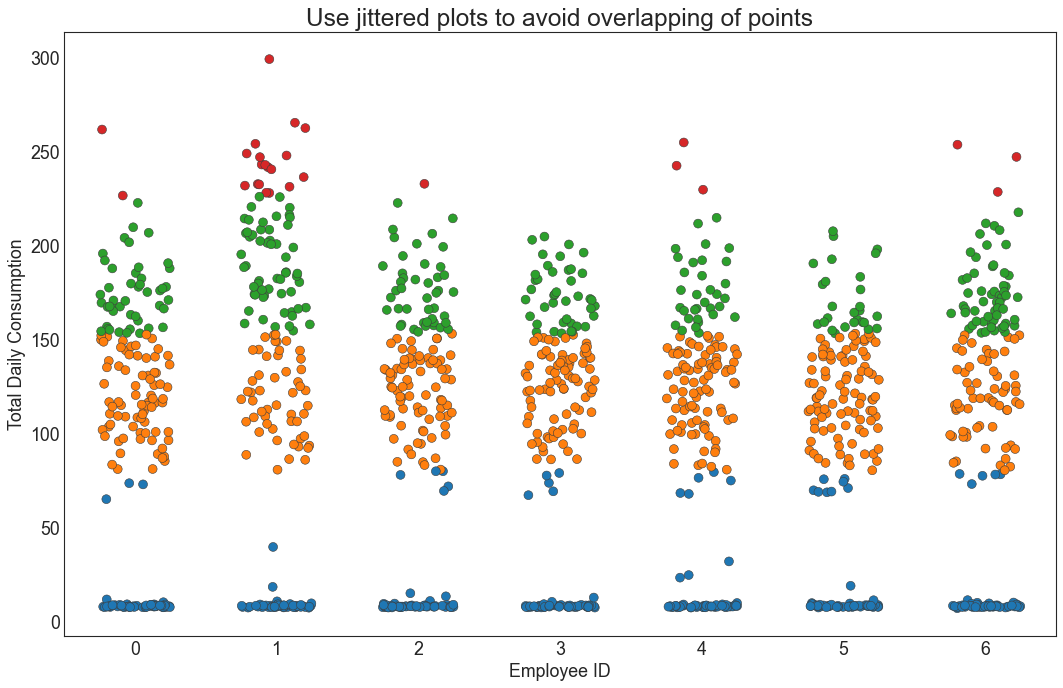

In [17]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(x="Employee ID", y="Total Daily Consumption", data = Daily_cons[Daily_cons.Month != 7], hue = "Daily Consumption Level", jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
ax.get_legend().remove()
plt.show()

In [34]:
fnl_UseApp.columns

Index(['Employee ID', 'Full Date', 'Date', 'Year', 'Month', 'Day', 'Weekday',
       'Week Number', 'Time', 'Working State', 'Action Type', 'App',
       'Time Spent', 'App Carbon Impact', 'Background Consumption',
       'Daily Consumption', 'Total Daily Consumption',
       'Daily Consumption Level', 'Total Weekly Consumption',
       'Weekly Consumption Level', 'Total Monthly Consumption',
       'Monthly Consumption Level'],
      dtype='object')

<Figure size 1280x800 with 0 Axes>

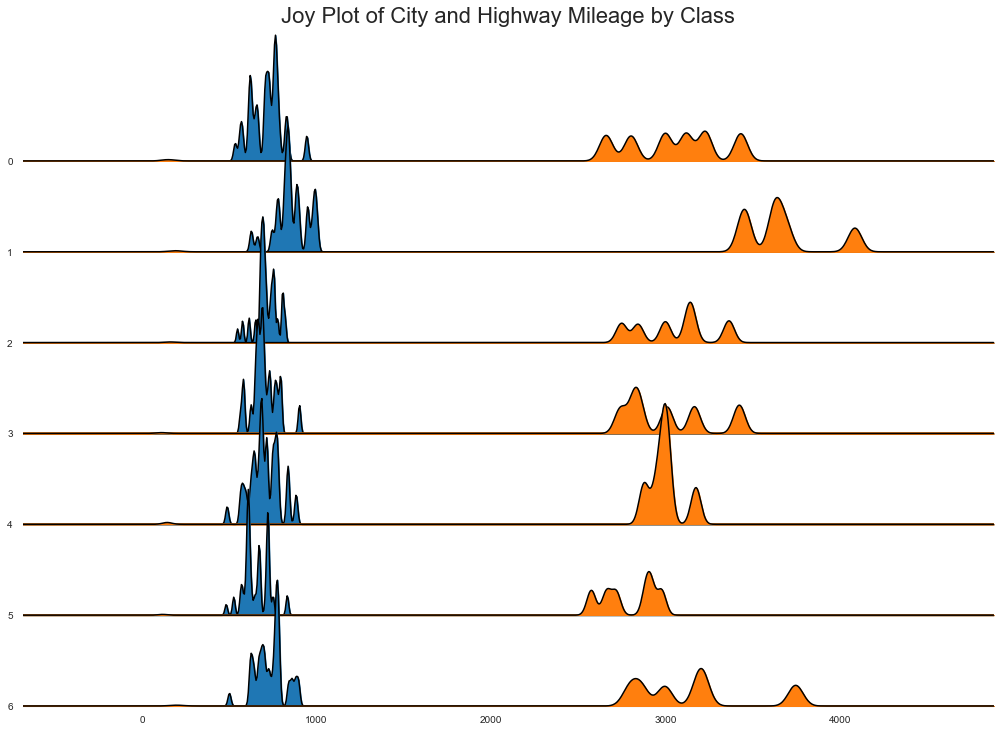

In [19]:
# Draw Plot
import joypy

plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(fnl_UseApp, column=['Total Weekly Consumption', 'Total Monthly Consumption'], by="Employee ID", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

In [35]:
Daily_cons = Use_App.groupby(['Employee ID', 'Week Number', 'Day', 'Month', 'Year'])['Daily Consumption'].max().reset_index().rename(columns = {'Daily Consumption':'Total Daily Consumption'})
Daily_cons['Daily Consumption Level'] = pd.cut(Daily_cons["Total Daily Consumption"], 4, labels=["Low", "Medium-Low", "Medium-High", "High"])
Daily_cons.sample(5)

,Employee ID,Week Number,Day,Month,Year,Total Daily Consumption,Daily Consumption Level
958,2,33,22,8,2021,8.285014,Low
1525,4,10,14,3,2021,7.208397,Low
1236,3,21,28,5,2021,154.246401,Medium-Low
31,0,5,4,2,2021,110.802252,Medium-Low
624,1,38,21,9,2021,63.114159,Low


In [674]:
!pip install statsmodels

C:\Users\Dorian\anaconda3\lib\threading.py:874: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs
C:\Users\Dorian\anaconda3\lib\threading.py:874: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  del self._target, self._args, self._kwargs
C:\Users\Dorian\anaconda3\lib\threading.py:874: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs


In [36]:
fnl_UseApp

,Employee ID,Full Date,Date,Year,Month,Day,Weekday,Week Number,Time,Working State,...,Time Spent,App Carbon Impact,Background Consumption,Daily Consumption,Total Daily Consumption,Daily Consumption Level,Total Weekly Consumption,Weekly Consumption Level,Total Monthly Consumption,Monthly Consumption Level
0,0,2021-01-01 08:40:00,2021-01-01,2021,1,1,Friday,53,08:40:00,Working,...,1,1.050,0.098224,1.148224,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
1,0,2021-01-01 08:41:00,2021-01-01,2021,1,1,Friday,53,08:41:00,Working,...,2,1.050,0.098224,2.296449,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
2,0,2021-01-01 08:42:00,2021-01-01,2021,1,1,Friday,53,08:42:00,Working,...,3,1.050,0.098224,3.444673,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
3,0,2021-01-01 08:43:00,2021-01-01,2021,1,1,Friday,53,08:43:00,Working,...,4,1.050,0.098224,4.592897,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
4,0,2021-01-01 08:44:00,2021-01-01,2021,1,1,Friday,53,08:44:00,Working,...,5,1.050,0.098224,5.741122,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239337,7,2021-12-30 18:41:00,2021-12-30,2021,12,30,Thursday,52,18:41:00,Working,...,63,0.154,0.095834,201.209314,202.208651,Medium-High,604.009176,Medium-High,3215.045094,Medium-Low
1239338,7,2021-12-30 18:42:00,2021-12-30,2021,12,30,Thursday,52,18:42:00,Working,...,64,0.154,0.095834,201.459149,202.208651,Medium-High,604.009176,Medium-High,3215.045094,Medium-Low
1239339,7,2021-12-30 18:43:00,2021-12-30,2021,12,30,Thursday,52,18:43:00,Working,...,65,0.154,0.095834,201.708983,202.208651,Medium-High,604.009176,Medium-High,3215.045094,Medium-Low
1239340,7,2021-12-30 18:44:00,2021-12-30,2021,12,30,Thursday,52,18:44:00,Working,...,66,0.154,0.095834,201.958817,202.208651,Medium-High,604.009176,Medium-High,3215.045094,Medium-Low


In [695]:
!pip install calmap

C:\Users\Dorian\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\Dorian\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
C:\Users\Dorian\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


In [40]:
fnl_UseApp

,Employee ID,Full Date,Year,Month,Day,Weekday,Week Number,Time,Working State,Action Type,...,Time Spent,App Carbon Impact,Background Consumption,Daily Consumption,Total Daily Consumption,Daily Consumption Level,Total Weekly Consumption,Weekly Consumption Level,Total Monthly Consumption,Monthly Consumption Level
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0,2021-01-01 08:40:00,2021,1,1,Friday,53,08:40:00,Working,Instagram,...,1,1.050,0.098224,1.148224,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
2021-01-01,0,2021-01-01 08:41:00,2021,1,1,Friday,53,08:41:00,Working,Instagram,...,2,1.050,0.098224,2.296449,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
2021-01-01,0,2021-01-01 08:42:00,2021,1,1,Friday,53,08:42:00,Working,Instagram,...,3,1.050,0.098224,3.444673,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
2021-01-01,0,2021-01-01 08:43:00,2021,1,1,Friday,53,08:43:00,Working,Instagram,...,4,1.050,0.098224,4.592897,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
2021-01-01,0,2021-01-01 08:44:00,2021,1,1,Friday,53,08:44:00,Working,Instagram,...,5,1.050,0.098224,5.741122,169.200277,Medium-High,185.152941,Low,3065.728988,Medium-Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,7,2021-12-30 18:41:00,2021,12,30,Thursday,52,18:41:00,Working,Microsoft Teams,...,63,0.154,0.095834,201.209314,202.208651,Medium-High,604.009176,Medium-High,3215.045094,Medium-Low
2021-12-30,7,2021-12-30 18:42:00,2021,12,30,Thursday,52,18:42:00,Working,Microsoft Teams,...,64,0.154,0.095834,201.459149,202.208651,Medium-High,604.009176,Medium-High,3215.045094,Medium-Low
2021-12-30,7,2021-12-30 18:43:00,2021,12,30,Thursday,52,18:43:00,Working,Microsoft Teams,...,65,0.154,0.095834,201.708983,202.208651,Medium-High,604.009176,Medium-High,3215.045094,Medium-Low


<Figure size 1280x800 with 0 Axes>

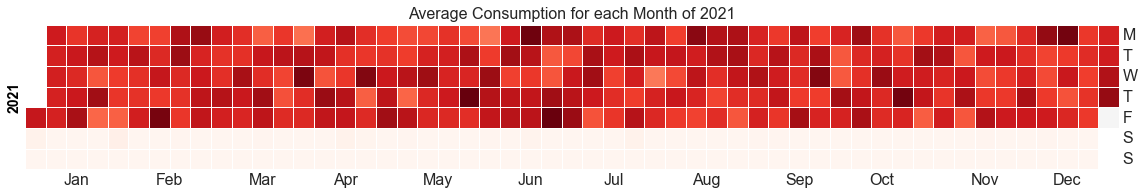

In [46]:
# dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
# df.set_index(dates, inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import matplotlib as mpl
import calmap

# fnl_UseApp.set_index('Date', inplace=True)

# Plot
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(fnl_UseApp['Total Daily Consumption'], daylabels='MTWTFSS', fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Average Consumption for each Month of 2021'})
plt.show()

# df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
# print(df)
# dates = pd.DatetimeIndex([d for d in fnl_UseApp['Date']])
# fnl_UseApp.set_index(dates, inplace=True)

# # Decompose 
# result = seasonal_decompose(fnl_UseApp['Total Daily Consumption'], model='multiplicative')

# # Plot
# plt.rcParams.update({'figure.figsize': (10,10)})
# result.plot().suptitle('Time Series Decomposition of Air Passengers')
# plt.show()

In [286]:
datetime(month = 6)

TypeError: 'module' object is not callable

---

In [359]:
type((0,0,0)) == tuple

True

In [7]:
class Data_Generation: #Define the Point of Sales Class
    def __init__(self, apps_df):
        self.name = "Data Generation"
        self.app_df = apps_df #Imported World Cities Dataset

        #Begin and End Date
        self.initial_date = datetime.datetime(2021, 1, 1, 9, 0) #2021-1-1 9AM
        self.duration = (0,1,0)
        self.end_date = self.initial_date + relativedelta(year = self.duration[0], month = self.duration[1], day = self.duration[2])
        self.weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]  #Weekdays
        
    
        #Choices
        self.empl = random.randint(5,10) #Generate X employees
        self.empl_roles_info = [("Data Scientist", 0.5), ("Management", 0.2), ("Community Manager", 0.2), ("Human Resources", 0.1)]
        self.empl_cpmtprle_info = [("None", 0.5), ("High Consumption", 0.15), ("Medium Consumption", 0.2), ("Low Consumption",0.15)]
        self.major_setting = ["Role", "Consumption Profile"]
        self.sub_setting = ["Add", "Remove", "Modify"]
        self.split()
           
    def split(self):
        self.split_role()
        self.split_cpmtprle()
        
    def split_role(self):
        lst_roles, lst_ratios = [], []
        for role, ratio in self.empl_roles_info:
            lst_roles.append(role)
            lst_ratios.append(ratio)
        self.empl_roles = lst_roles
        self.empl_roles_ratio = lst_ratios
    
    def split_cpmtprle(self):
        lst_consprle, lst_ratios = [], []
        for cnsprle, ratio in self.empl_cpmtprle_info:
            lst_consprle.append(cnsprle)
            lst_ratios.append(ratio)
        self.empl_cpmtprle = lst_consprle
        self.empl_cpmtprle_ratio = lst_ratios
        
        
    def manage_subchoice(self, major_setting, setting, arg_name, arg_ratio=0):
        if major_setting == "Role":
            self.manage_role(setting, arg_name, arg_ratio)
        else:
            self.manage_cpmtprle(setting, arg_name, arg_ratio)
    
    def manage_role(self, setting, arg_role, arg_ratio = 0):
        if setting ==  "Add":
            if isinstance(arg_role, str):
                self.add_role(arg_role, arg_ratio)
            else:
                for role, ratio in zip(arg_role, arg_ratio):
                    self.add_role(role, ratio)
                    
        elif setting == "Modify":
            if isinstance(arg_role, str):
                self.modify_role(arg_role, arg_ratio)
            else:
                for role, nratio in zip(arg_role, arg_ratio):
                    self.modify_role(role, nratio)
                    
        elif setting == "Remove":
            if isinstance(arg_role, str):
                self.remove_role(arg_role)
            else:
                for role in arg_role:
                    self.remove_role(role)  
                    
    def add_role(self, role, ratio):
        if len(list(filter(lambda a: a[0] != role, self.empl_roles_info))) == len(self.empl_roles_info): 
            self.empl_roles_info.append((role, ratio))
            self.update_role_appearance()
            self.split_role()
        else:
            print("The Role is already existing!")

    def modify_role(self, role, nw_ratio):
        if len(list(filter(lambda a: a[0] != role, self.empl_roles_info))) == len(self.empl_roles_info): 
            print("The Generator does not include this role!")
        else:
            for idx, role_ratio in enumerate(self.empl_roles_info):
                if role_ratio[0] == role:
                    self.empl_roles_info[idx] = (role, nw_ratio)
            self.update_role_appearance()
            self.split_role()
            
    def remove_role(self, role):
        if len(list(filter(lambda a: a[0] != role, self.empl_roles_info))) == len(self.empl_roles_info): 
           print("The Generator does not include this role!")
        else:
            self.empl_roles_info = list(filter(lambda a: a[0] != role, self.empl_roles_info))
            self.update_role_appearance()
            self.split_role()

    def update_role_appearance(self):
        ratios = [ratio for _, ratio in self.empl_roles_info]
        ratio = 1 / sum(ratios)
        self.empl_roles_info = [(role, round(ratio * prev_ratio,3)) for role, prev_ratio in self.empl_roles_info]
        self.empl_roles_info = sorted(self.empl_roles_info, key=lambda pair: pair[1], reverse=True)

        
                        
    def manage_cpmtprle(self, setting, arg_cpmtprle, arg_ratio = 0):
        if setting ==  "Add":
            if isinstance(arg_cpmtprle, str):
                self.add_cpmtprle(arg_cpmtprle, arg_ratio)
            else:
                for prfle, ratio in zip(arg_cpmtprle, arg_ratio):
                    self.add_cpmtprle(prfle, ratio)
                    
        elif setting == "Modify":
            if isinstance(arg_cpmtprle, str):
                self.modify_cpmtprle(arg_cpmtprle, arg_ratio)
            else:
                for prfle, nratio in zip(arg_cpmtprle, arg_ratio):
                    self.modify_cpmtprle(prfle, nratio)
                    
        elif setting == "Remove":
            if isinstance(arg_cpmtprle, str):
                self.remove_cpmtprle(arg_cpmtprle)
            else:
                for prfle in arg_cpmtprle:
                    self.remove_cpmtprle(prfle)    
                              
    
    def add_cpmtprle(self, cpmtprle, ratio):
        if len(list(filter(lambda a: a[0] != cpmtprle, self.empl_cpmtprle_info))) == len(self.empl_cpmtprle_info): 
            self.empl_cpmtprle_info.append((cpmtprle, ratio))
            self.update_cpmtprle_appearance()
            self.split_cpmtprle()
        else:
            print("The Role is already existing!")

    def modify_cpmtprle(self, cpmtprle, nw_ratio):
        if len(list(filter(lambda a: a[0] != cpmtprle, self.empl_cpmtprle_info))) == len(self.empl_cpmtprle_info): 
            print("The Generator does not include this role!")
        else:
            for idx, cpmtprle_ratio in enumerate(self.empl_cpmtprle_info):
                if cpmtprle_ratio[0] == cpmtprle:
                    self.empl_cpmtprle_info[idx] = (cpmtprle, nw_ratio)
            self.update_cpmtprle_appearance()
            self.split_cpmtprle()
            
    def remove_cpmtprle(self, cpmtprle):
        if len(list(filter(lambda a: a[0] != cpmtprle, self.empl_cpmtprle_info))) == len(self.empl_cpmtprle_info): 
           print("The Generator does not include this role!")
        else:
            self.empl_cpmtprle_info = list(filter(lambda a: a[0] != cpmtprle, self.empl_cpmtprle_info))
            self.update_cpmtprle_appearance()
            self.split_cpmtprle()

    def update_cpmtprle_appearance(self):
        ratios = [ratio for _, ratio in self.empl_cpmtprle_info]
        ratio = 1 / sum(ratios)
        self.empl_cpmtprle_info = [(role, round(ratio * prev_ratio,3)) for role, prev_ratio in self.empl_cpmtprle_info]
        self.empl_cpmtprle_info = sorted(self.empl_cpmtprle_info, key=lambda pair: pair[1], reverse=True)
        
    
    ##################
    # Other Function #
    ##################
    
    #Function to append the value to the corresponding dictionnary key
    def append_dict(data_dict, lst_key, lst_value):
        for key, val in zip(lst_key, lst_value):
            data_dict[key].append(val)
        return data_dict
    
    def Weekly_Pattern(self):
        days = self.weekdays[:-2]  #Weekdays without Week-end
        ran = random.uniform(0, 1)
        day_lst = random.sample(days, 1) if ran < 0.25 else random.sample(days, 2) if 0.25 <= ran <= 0.75 else random.sample(days, 3)
        return day_lst
    
    #Function that generate values corresponding to some conditions
    def generate_time_data(self, current_daytime, weekdays):
        year = current_daytime.year
        month = current_daytime.month
        day = current_daytime.day
        weekday = weekdays[current_daytime.weekday()]
        time_hm = current_daytime.time()
        date = datetime.datetime(year, month, day)

        return date, year, month, day, weekday, time_hm

    
    #Function that generate values corresponding to some conditions
    def generate_values(self, user_browser, user_vconf, daily_cons, moment):
        
        #If Weekend (S&S)
        if moment == "Day Off":
            w_state = "Late"
            act = None
            app = None
            carbon = 0
            back_cons = random.uniform(0, 0.05)
            daily_cons += + carbon + back_cons
            return w_state, app, act, carbon, back_cons, daily_cons

        elif moment == "Late":
            w_state = "Late"
            act = None
            app = None
            carbon = 0
            back_cons = random.uniform(0, 0.1)
            daily_cons += + carbon + back_cons
            return w_state, app, act, carbon, back_cons, daily_cons
        
        
        elif moment == "High Consumption":
            w_state = "Working"
            rand_app = random.random()
            conditions_act = [rand_app <= 0.35, 0.25 < rand_app < 0.70, 0.7 <= rand_app]
            choice_act = ['Basic Research', 'Video Conferencing', 'Newsfeed']
            act = np.select(conditions_act, choice_act)
            conditions_app = [act == 'Basic Research', act == 'Video Conferencing', act == 'Newsfeed']
            choice_app = [user_browser, random.choice(user_vconf), random.choice(np.unique(self.app_df.Application[self.app_df.Actions == act]))]
            app = np.select(conditions_app, choice_app)
            carbon = float(self.app_df.Carbon_Impact[self.app_df.Application == app])
            back_cons = random.uniform(0, 0.1)
            if act == 'Newsfeed':
                duration = random.randint(1,10)
            elif act == 'Video Conferencing':
                duration = random.randint(20, 90)      
            else:
                duration = random.randint(1, 5)
            return w_state, app, act, carbon, back_cons, duration


        elif moment == "Normal Consumption":
            w_state = "Working"
            rand_app = random.random()
            conditions_act = [rand_app <= 0.4, 0.4 < rand_app < 0.6, 0.6 <= rand_app]
            choice_act = ['Basic Research', 'Video Conferencing', 'Newsfeed']
            act = np.select(conditions_act, choice_act)
            conditions_app = [act == 'Basic Research', act == 'Video Conferencing', act == 'Newsfeed']
            choice_app = [user_browser, random.choice(user_vconf), random.choice(np.unique(self.app_df.Application[self.app_df.Actions == act]))]
            app = np.select(conditions_app, choice_app)
            carbon = float(self.app_df.Carbon_Impact[self.app_df.Application == app])
            back_cons = random.uniform(0, 0.1)
            if act == 'Newsfeed':
                duration = random.randint(1,20)
            elif act == 'Video Conferencing':
                duration = random.randint(20, 90)      
            else:
                duration = random.randint(1, 5)
            return w_state, app, act, carbon, back_cons, duration
                    
        elif moment == "No Consumption":
            w_state = "Working"
            act = None
            app = None
            carbon = 0
            back_cons = random.uniform(0.1, 0.25)
            daily_cons += + carbon + back_cons
            return w_state, app, act, carbon, back_cons, daily_cons
        
        elif moment == "Lunch Break":
            w_state = "Break"
            act = None
            app = None
            carbon = 0
            back_cons = random.uniform(0, 0.2)
            daily_cons += + carbon + back_cons
            return w_state, app, act, carbon, back_cons, daily_cons

    #######################
    # Generation Function #
    #######################
    
    def Generation(self):
        general_dict = dict({"Employee ID":[], "Employee Role":[], "Employee Consumption Level": [],
        "Full Date":[], "Date":[], "Year":[], "Month":[], "Day":[], "Weekday":[], "Week Number":[], "Time":[], 
        "Working State":[], "Action Type":[], "App":[], "Time Spent":[],
        "App Carbon Impact":[], "Background Consumption":[], "Daily Consumption":[]
        })
        
        lst_id = []                    
        for n in range(self.empl):
            employee_identifier = str(0) +''.join([random.choice(string.ascii_letters + string.digits) for n in range(8)])
            employee_role = "".join(random.choices([role for role, _ in self.empl_roles_info], [ratio for _,ratio in self.empl_roles_info]))
            employee_conslevl = "".join(random.choices([cpmtprle for cpmtprle, _ in self.empl_cpmtprle_info], [ratio for _,ratio in self.empl_cpmtprle_info]))

            current_day = self.initial_date #Set the Initial Date
            week_num = int(current_day.strftime("%V")) #Set the Initial Week Calendar Number
            day_lst = self.Weekly_Pattern() #Set the Initial Weekly Pattern
            user_browser = random.choice(np.unique(self.app_df.Application[self.app_df.Actions == "Basic Research"])) #Select a single Browser
            user_vconf = [random.choice(np.unique(self.app_df.Application[self.app_df.Actions == "Video Conferencing"])) for _ in range(2)] #Select up to two different Video Conferencing App

            while current_day <= self.end_date:
                end_day = datetime.datetime(current_day.year, current_day.month, current_day.day, 18, 0) #Set the Daily End Work Hours
                daily_cons = 0 #Set the Daily Carbon Consumption as 0
                true_start = current_day + relativedelta(minutes=random.randint(-20, 30)) #Define the True Time (when the employee arrives at the Office)
                lunch_break = False #Set the "Lunch Break" Boolean at False
                ini_time = current_day if true_start > current_day else true_start #Define the Initial Time depending on a Condition

                if week_num == int(current_day.strftime("%V")):
                        pass
                else:
                    week_num = int(current_day.strftime("%V"))
                    day_lst = self.Weekly_Pattern()
            
                #Check if the employee is Late
                if ini_time < true_start: #Check that the Initial Time is lower than the True Time
                    for d in range(1, int((true_start - current_day).seconds/60)+1): #Loop for the Time the Employee is Late
                        w_state, act, app, carbon, back_cons, daily_cons = self.generate_values(user_browser, user_vconf, daily_cons, "Late")  
                        date, year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                        lst_values = [employee_identifier, employee_role, employee_conslevl, ini_time, date, year, month, day, weekday, week_num, time, w_state, act, app, d, carbon, back_cons, daily_cons]
                        append_dict(general_dict, list(general_dict.keys()), lst_values)
                        ini_time += relativedelta(minutes=1) #Incremente the Current Time by a minute
                else:
                    pass
                
                while ini_time <= end_day:
                    ini_time += relativedelta(minutes=1) #Incremente the Current Time by a minute
                current_day += relativedelta(months=1)
        
        self.test = pd.DataFrame.from_dict(general_dict)

In [8]:
apps_footprint = pd.read_csv("../../Carbon_Impact/Data/apps.csv", delimiter=';')


In [9]:
#1 - Create the Class
G = Data_Generation(apps_footprint)

G.Generation()
G.test.sample(10)

NameError: name 'generate_time_data' is not defined

In [55]:
#1 - Create the Class
G = Data_Generation(apps_footprint)

#2 - Check the Initial Date 
print("Begin Date:", G.initial_date)

#3 - Check the Duration
print("Y-M-D:", G.duration)

#4 - Check the End Date
print("Final Date:", G.end_date)

#5 - Check the Weekdays
print("Weekdays:", G.weekdays)

Begin Date: 2021-01-01 09:00:00
Y-M-D: (0, 1, 0)
Final Date: 2021-01-01 09:00:00
Weekdays: ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [56]:
#1 - Create the Class
G = Data_Generation(apps_footprint)

#1 - Check the number of Employees
print("Number of Employees:", G.empl)

#2 - Check the Existing Choice
print("Major Choices:", G.major_setting)

#2 - Check the Existing Sub Choice
print("Sub Choices:", G.sub_setting)

#Space
print("")

#3 - Check the Existing Role
print("Employees Roles:", G.empl_roles_info)

#3.1 - Add a Role
G.manage_subchoice("Role", "Add", "Data Analyst", 0.2)
print("New Data Analyst Role:", G.empl_roles_info)

#3.2 - Modify a Role
G.manage_subchoice("Role", "Modify", "Data Analyst", 0.5)
print("Modify Data Analyst Role:", G.empl_roles_info)

#3.3 - Remove a Role
G.manage_subchoice("Role", "Remove", "Data Analyst")
print("Remove Data Analyst Role:", G.empl_roles_info)

#Space
print("")

#4 - Check the Existing Consumption Profile
print("Employees Roles:", G.empl_cpmtprle_info)

#4.1 - Add a Consumption Profile
G.manage_subchoice("Consumption Profile", "Add", "Medium-High Consumption", 0.25)
print("New Consumption Profile:", G.empl_cpmtprle_info)

#3.2 - Modify a Consumption Profile
G.manage_subchoice("Consumption Profile", "Modify", "Medium-High Consumption", 0.5)
print("Modify Consumption Profile:", G.empl_cpmtprle_info)

#3.3 - Remove a Consumption Profile
G.manage_subchoice("Consumption Profile", "Remove", "Medium-High Consumption")
print("Remove Consumption Profile:", G.empl_cpmtprle_info)

Number of Employees: 10
Major Choices: ['Role', 'Consumption Profile']
Sub Choices: ['Add', 'Remove', 'Modify']

Employees Roles: [('Data Scientist', 0.5), ('Management', 0.2), ('Community Manager', 0.2), ('Human Resources', 0.1)]
New Data Analyst Role: [('Data Scientist', 0.417), ('Management', 0.167), ('Community Manager', 0.167), ('Data Analyst', 0.167), ('Human Resources', 0.083)]
Modify Data Analyst Role: [('Data Analyst', 0.375), ('Data Scientist', 0.313), ('Management', 0.125), ('Community Manager', 0.125), ('Human Resources', 0.062)]
Remove Data Analyst Role: [('Data Scientist', 0.501), ('Management', 0.2), ('Community Manager', 0.2), ('Human Resources', 0.099)]

Employees Roles: [('None', 0.5), ('High Consumption', 0.15), ('Medium Consumption', 0.2), ('Low Consumption', 0.15)]
New Consumption Profile: [('None', 0.4), ('Medium-High Consumption', 0.2), ('Medium Consumption', 0.16), ('High Consumption', 0.12), ('Low Consumption', 0.12)]
Modify Consumption Profile: [('Medium-High 